In [28]:
## Loading Libraries
import seaborn as sns
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [29]:
# reading the data
data = pd.read_csv('Heart Failure Prediction Dataset.csv')  

# Explore the dataset
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing

Initially the Dataset should be balanced then have to make them imbalanced so that checking its blanced.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

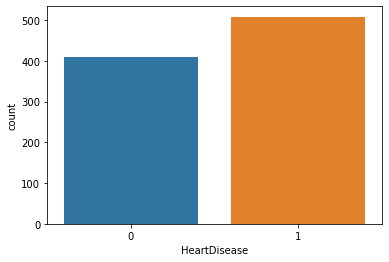

In [30]:
sns.countplot(x=data["HeartDisease"])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Categorical Value

In [32]:
# converting  Categorical string Value into Categorical Value.

data['Sex'].replace(['M','F'],[0,1],inplace=True)
data['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
data['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
data['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
data['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [34]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Histogram

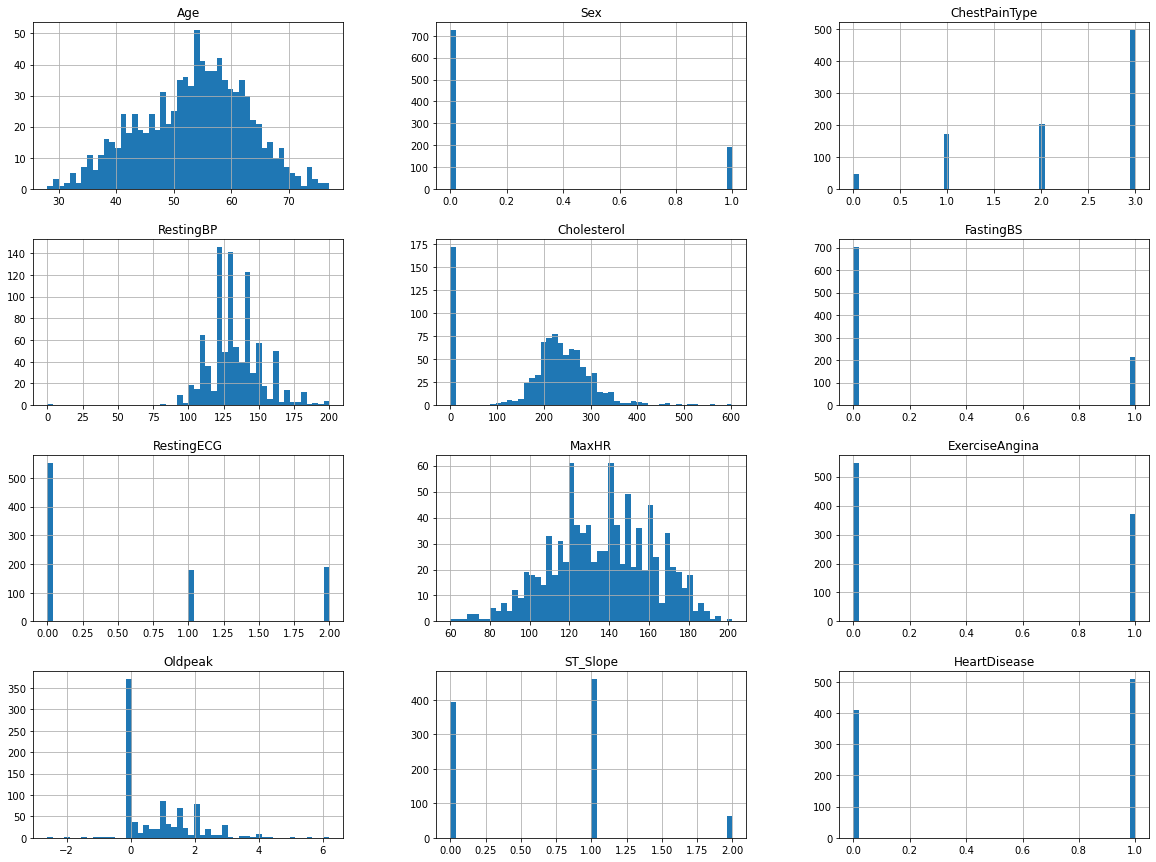

In [35]:
_ = data.hist(bins=50, figsize=(20,15))

In [36]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


# Heatmap

<AxesSubplot:>

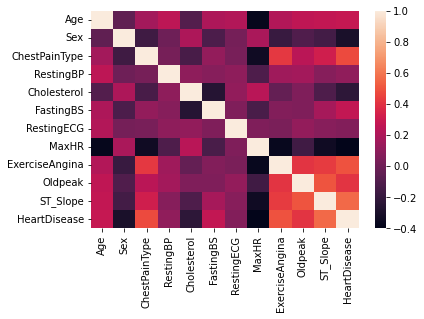

In [37]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

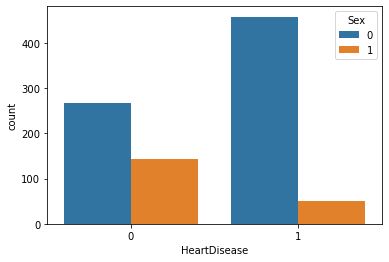

In [38]:
sns.countplot(data = data,x='HeartDisease',hue='Sex')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

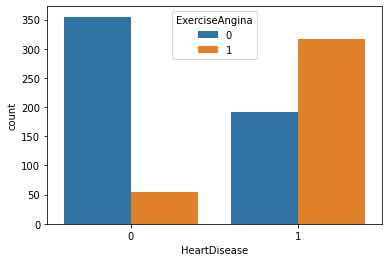

In [39]:
sns.countplot(data = data,x='HeartDisease',hue='ExerciseAngina')

# Creating three Imbalance versions 

In [40]:
grouped = data.groupby(data.HeartDisease)  #Slipting the rows by 0 and 1 class
df_class_one = grouped.get_group(1)
df_class_zero = grouped.get_group(0)
print(df_class_one.shape,df_class_zero.shape)

(508, 12) (410, 12)


In [41]:
df_class_Low_imbalance = df_class_zero[:275]     #Low imbalance (65%)
df_class_Medium_imbalance = df_class_zero[:185]  #Medium imbalance (75%)
df_class_High_imbalance = df_class_zero[:50]     #High imbalance (90%)

df_Low_imbalance = pd.concat([df_class_one, df_class_Low_imbalance], ignore_index = True)
df_Low_imbalance.reset_index()

df_Medium_imbalance = pd.concat([df_class_one, df_class_Medium_imbalance], ignore_index = True)
df_Medium_imbalance.reset_index()

df_High_imbalance = pd.concat([df_class_one, df_class_High_imbalance], ignore_index = True)
df_High_imbalance.reset_index()
  
print(df_Low_imbalance.shape,df_Medium_imbalance.shape,df_High_imbalance.shape)

(783, 12) (693, 12) (558, 12)


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

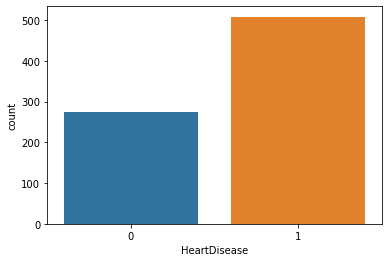

In [42]:
sns.countplot(x=df_Low_imbalance["HeartDisease"])  #Low imbalance

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

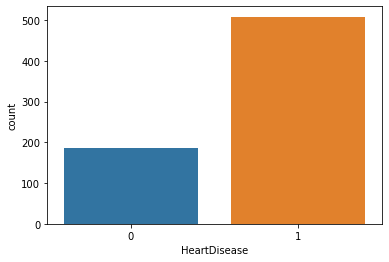

In [43]:
sns.countplot(x=df_Medium_imbalance["HeartDisease"])  #Medium imbalance

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

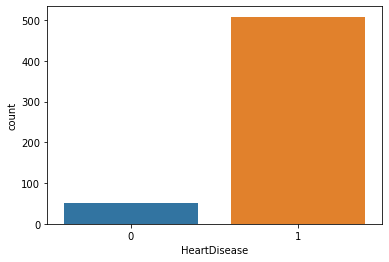

In [44]:
sns.countplot(x=df_High_imbalance["HeartDisease"])  #High imbalance